In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [13]:
#load 2 examples
tower = np.load('data/full_numpy_bitmap_The Eiffel Tower.npy')
clock = np.load('data/full_numpy_bitmap_alarm clock.npy')

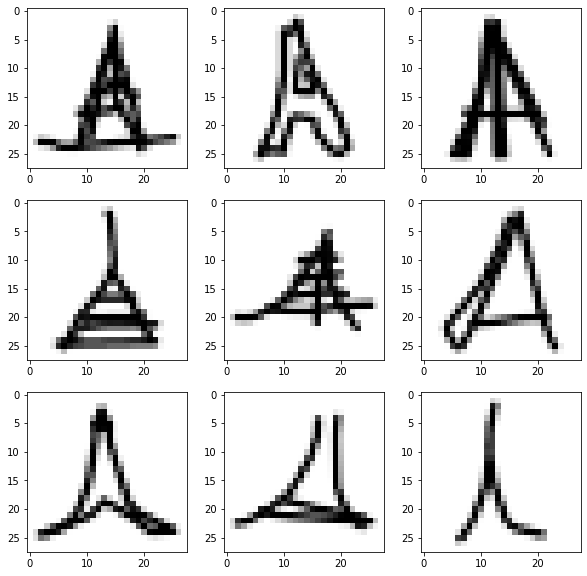

In [14]:
plt.subplots(3,3, figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(tower[i].reshape(28,28), cmap ='Greys')
plt.show()

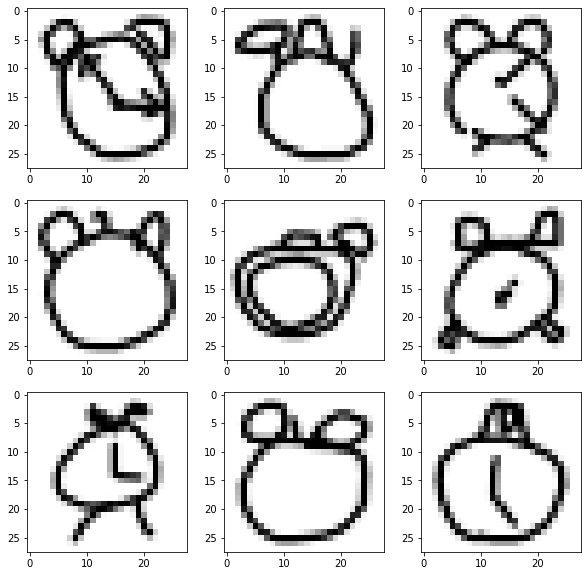

In [15]:
plt.subplots(3,3, figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(clock[i].reshape(28,28), cmap = "Greys")
plt.show()

In [16]:
tower.shape

(134801, 784)

In [32]:
#take 1000 samples
tower_1000 = tower[:100,:]
clock_1000 = clock[:100,:]

In [33]:
#these arrays are between 0-255
#ive got two shapes, lets take 1000 of each, lets combine the data,
#create a target of labels

In [34]:
#create a list of the target names
targets = list(['tower', 'clock'])
labels = tuple(enumerate(targets))
labels

((0, 'tower'), (1, 'clock'))

In [35]:
y = []
for i in range(2):
    for j in range(clock_1000.shape[0]):
        y.append(i)


In [36]:
y = np.array(y)

In [37]:
y.shape

(200,)

In [23]:
X = np.concatenate((tower_1000,clock_1000))

In [24]:
print(X.shape)
print(y.shape)

(200, 784)
(200,)


In [25]:
#next, split train test split, stratify by y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)


In [26]:
#Fit a logistic regression model using lbfgs
model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
model_lr.fit(X_train,y_train)
print("The train accuracy is: " +str(100*(round(model_lr.score(X_train, y_train),3)))+"%")
print("The test accuracy is: " +str(100*(round(model_lr.score(X_test, y_test),3)))+"%")

The train accuracy is: 100.0%
The test accuracy is: 93.8%


In [39]:
#Create a graph that shows accuracy based on number of samples
train_acc = []
test_acc = []
sample_size_list = range(1,3)
sample_size = []

for i in sample_size_list:
    sample_size.append(10**i)
    tower_1000 = tower[:10**i,:]
    clock_1000 = clock[:10**i,:]

    y = []
    for i in range(2):
        for j in range(clock_1000.shape[0]):
            y.append(i)

    X = np.concatenate((tower_1000,clock_1000))

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y, random_state = 1)
    model_lr = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 100,random_state = 0)
    model_lr.fit(X_train,y_train)

    train_acc.append(model_lr.score(X_train,y_train))
    test_acc.append(model_lr.score(X_test,y_test))



Text(0, 0.5, 'Accuracy')

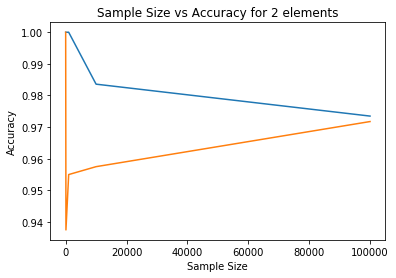

In [28]:
plt.figure()
plt.plot(sample_size, train_acc)
plt.plot(sample_size, test_acc)
plt.title('Sample Size vs Accuracy for 2 elements')
plt.xlabel('Sample Size')
plt.ylabel('Accuracy')


In [41]:
y.shape

AttributeError: 'list' object has no attribute 'shape'

In [38]:
test_acc

[1.0, 0.9375, 0.955, 0.9575, 0.9717625]